## Import Required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)
import joblib
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

## Read the Test and Train Dataset

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')


In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
train_df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
train_df.shape

(614, 13)

## Fill missing numerical values with median

In [8]:
for col in train_df.select_dtypes(include=np.number).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())

## Fill missing categorical values with mode

In [9]:
for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

In [10]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Convert the target variable 'Loan_Status' from categorical ('Y', 'N') to numerical (1, 0) for model training

In [11]:
train_df.Loan_Status=train_df.Loan_Status.map({'Y':1,'N':0})

In [12]:
train_df.Loan_Status.head(10)

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: Loan_Status, dtype: int64

## Save the target variable 'Loan_Status' to a separate variable and remove it from the training features

In [13]:
Loan_status=train_df.Loan_Status
train_df.drop('Loan_Status',axis=1,inplace=True)

## Combine the processed training and test datasets into a single DataFrame for consistent preprocessing

In [14]:
data = pd.concat([train_df, test_df], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.096840,342.564730,0.849134
std,5695.104533,2718.772806,76.387838,64.482011,0.358101
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,101.000000,360.000000,1.000000
50%,3800.000000,1110.000000,128.000000,360.000000,1.000000
75%,5516.000000,2365.000000,160.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
data.shape

(981, 12)

In [17]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Convert the 'Gender' column from categorical values ('Male', 'Female') to numerical values (1, 0)

In [18]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

Gender
1    799
0    182
Name: count, dtype: int64

In [19]:
data.tail(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
966,LP002907,1,Yes,0,Graduate,No,5817,910.0,109.0,360.0,1.0,Urban
967,LP002920,1,Yes,0,Graduate,No,5119,3769.0,120.0,360.0,1.0,Rural
968,LP002921,1,Yes,3+,Not Graduate,No,5316,187.0,158.0,180.0,0.0,Semiurban
969,LP002932,1,Yes,3+,Graduate,No,7603,1213.0,197.0,360.0,1.0,Urban
970,LP002935,1,Yes,1,Graduate,No,3791,1936.0,85.0,360.0,1.0,Urban
971,LP002952,1,No,0,Graduate,No,2500,0.0,60.0,360.0,1.0,Urban
972,LP002954,1,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,1.0,Rural
973,LP002962,1,No,0,Graduate,No,4000,2667.0,152.0,360.0,1.0,Semiurban
974,LP002965,0,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,1.0,Urban
975,LP002969,1,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban


## Convert the 'Married' column from categorical values ('Yes', 'No') to numerical values (1, 0)

In [20]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [21]:
data.Married.value_counts()

Married
1    634
0    347
Name: count, dtype: int64

## Convert the 'Dependents' column from categorical values ('0', '1', '2', '3+') to numerical values (0, 1, 2, 3)

In [22]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [23]:
data.Dependents.value_counts()

Dependents
0    570
1    160
2    160
3     91
Name: count, dtype: int64

## Convert the 'Education' column from categorical values ('Graduate', 'Not Graduate') to numerical values (1,0)

In [24]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [25]:
data.Education.value_counts()

Education
1    763
0    218
Name: count, dtype: int64

## Convert the 'Self_employed' column from categorical values ('Yes', 'No') to numerical values (1, 0)

In [26]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [27]:
data.Self_Employed.value_counts()

Self_Employed
0    862
1    119
Name: count, dtype: int64

## Convert the 'Property_Area' column from categorical values ('Rural', 'Semiurban', 'Urban') to numerical values (0, 1, 2)

In [28]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [29]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


## Drop Loan_ID column 

In [30]:
data.drop('Loan_ID',inplace=True,axis=1)

## Calculate and visualize the correlation matrix for all numerical features in the combined dataset

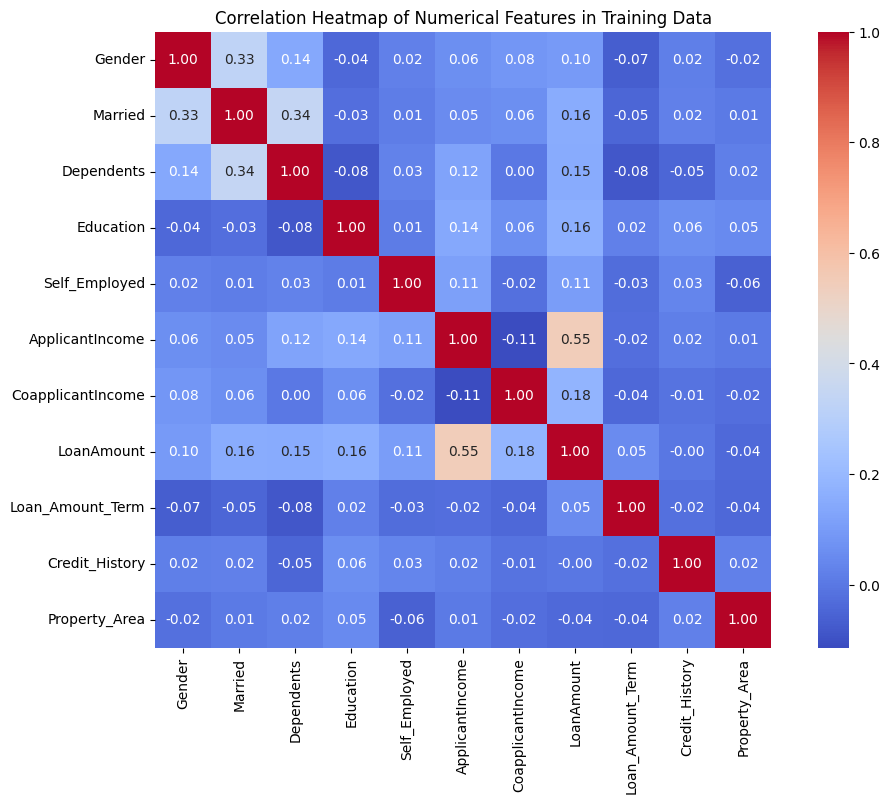

In [31]:
corr_matrix = data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features in Training Data")
plt.show()

## Separate the first 614 rows as the training feature set (train_X)

In [32]:
train_X=data.iloc[:614,]
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


In [33]:
train_y=Loan_status  

## Split the training data into training and validation sets for model evaluation

In [34]:
X_train, X_val, y_train, y_val = train_test_split(
    train_X, train_y, test_size=0.2, random_state=42, stratify=train_y
)

## Train linear regression model

In [35]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Make predictions

In [36]:
y_train_pred = model.predict(X_val)
# y_val_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]
y_train_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

## Evaluate model

In [37]:
print("Accuracy:", accuracy_score(y_val, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_train_pred))
print("Classification Report:\n", classification_report(y_val, y_train_pred))

Accuracy: 0.8536585365853658
Confusion Matrix:
 [[22 16]
 [ 2 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.84      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.88      0.78      0.81       123
weighted avg       0.86      0.85      0.84       123



## Save the Trained Model for use in the User Interface

In [38]:
joblib.dump(model, "model.pkl")

['model.pkl']

## Predict the Test Dataset and save the predictions in a CSV file 

In [39]:
test_df=data.iloc[614:,]
final_pred_prob = model.predict(test_df)
final_pred = (final_pred_prob >= 0.5).astype(int)
test_df['Loan_Status'] = final_pred
test_df.to_csv("predicted_data.csv")

## Extract and visualize feature importances (coefficients) from the trained logistic regression model


Feature Importance (Logistic Regression Coefficients):
              Feature  Coefficient
9      Credit_History     3.136870
1             Married     0.649698
3           Education     0.223874
10      Property_Area     0.143491
2          Dependents     0.131160
5     ApplicantIncome    -0.000005
6   CoapplicantIncome    -0.000063
7          LoanAmount    -0.000258
8    Loan_Amount_Term    -0.001818
4       Self_Employed    -0.369269
0              Gender    -0.514318


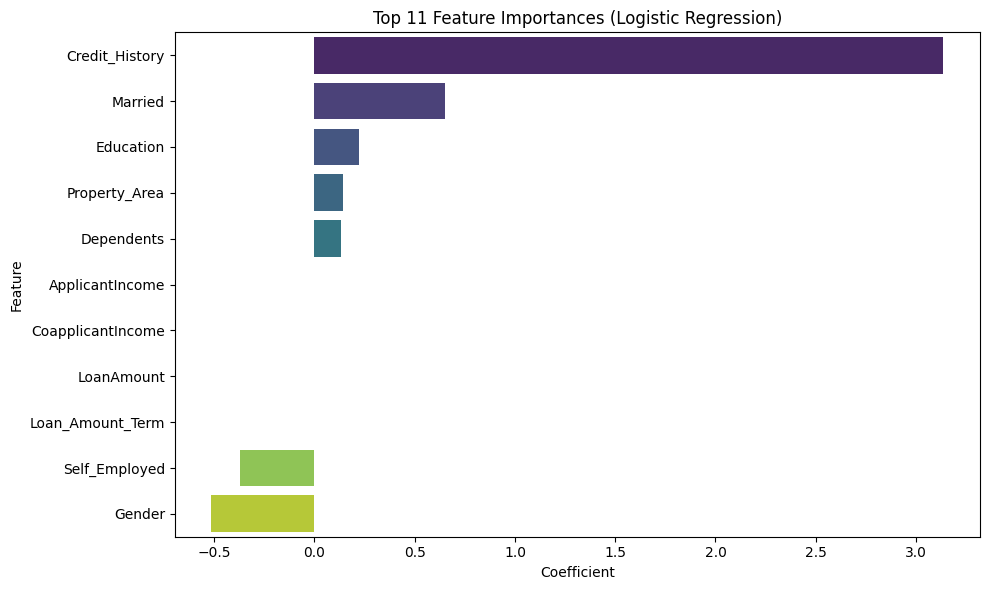

In [40]:
# Extract feature importances (coefficients) from logistic regression
coefficients = model.coef_[0]  # model.coef_ is a 2D array: shape (1, n_features)

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
print("\nFeature Importance (Logistic Regression Coefficients):")
print(feature_importance)

# Plot the top 11 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(11), x='Coefficient', y='Feature', palette='viridis')
plt.title("Top 11 Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.show()